### Packages import

In [7]:
import numpy as np
import talib as ta
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

### Load data from CSV file, convert timestamp to datetime, set timeperiod to plot

In [11]:
# read data from CSV
df = pd.read_csv('indicator_price.csv', header=0, sep=',')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# make index a timestamp
df.index = pd.DatetimeIndex(df.timestamp)

# use only time when I did crawling
start = df.iloc[11300]['timestamp']
end = df.iloc[27400]['timestamp']
dflim = df.loc[start:end]

# choose a currency
btc_df = dflim[(dflim.coin=='BTC') ]
eth_df = dflim[(dflim.coin=='ETH') ]

btc_df.head(10)


,id,source,coin,satoshis,wei,usdt,timestamp
timestamp,,,,,,,
2017-10-19 10:55:44.784340,11271,0,BTC,100000000,NaN,5689.000000,2017-10-19 10:55:44.784340
2017-10-19 10:56:45.816110,11341,0,BTC,100000000,NaN,5688.999990,2017-10-19 10:56:45.816110
2017-10-19 10:57:46.368880,11411,0,BTC,100000000,NaN,5683.310990,2017-10-19 10:57:46.368880
2017-10-19 10:58:47.047630,11481,0,BTC,100000000,NaN,5673.000000,2017-10-19 10:58:47.047630
2017-10-19 10:59:47.985000,11551,0,BTC,100000000,NaN,5674.320000,2017-10-19 10:59:47.985000
2017-10-19 11:00:49.089850,11621,0,BTC,100000000,NaN,5674.320000,2017-10-19 11:00:49.089850
2017-10-19 11:01:50.044500,11691,0,BTC,100000000,NaN,5680.320001,2017-10-19 11:01:50.044500
2017-10-19 11:02:51.153500,11761,0,BTC,100000000,NaN,5688.000000,2017-10-19 11:02:51.153500
2017-10-19 11:03:52.210060,11831,0,BTC,100000000,NaN,5690.000000,2017-10-19 11:03:52.210060


### Do SMA with talib

In [43]:
# resample to short time trading in 15 min bins
btc_ts = btc_df.usdt.resample('5min').mean()

# calculate SMA4 and SMA15 and combine a df to plot
dfplot = pd.DataFrame(index = btc_ts.index)
dfplot.loc[:,'price'] = btc_ts.values
dfplot.loc[:,'SMA_low'] = ta.SMA(np.asarray(btc_ts), 4)
dfplot.loc[:,'SMA_high'] = ta.SMA(np.asarray(btc_ts), 15)
dfplot.loc[:,'ind_A'] = dfplot.loc[:,'price'] - dfplot.loc[:,'SMA_low']
dfplot.loc[:,'ind_B'] = dfplot.loc[:,'price'] - dfplot.loc[:,'SMA_high']
dfplot.loc[:,'ind_C'] = dfplot.loc[:,'SMA_low'] - dfplot.loc[:,'SMA_high']

dfplot.head(20)


,price,SMA_low,SMA_high,ind_A,ind_B,ind_C
timestamp,,,,,,
2017-10-19 10:55:00,5681.726196,NaN,NaN,NaN,NaN,NaN
2017-10-19 11:00:00,5685.528000,NaN,NaN,NaN,NaN,NaN
2017-10-19 11:05:00,5703.780000,NaN,NaN,NaN,NaN,NaN
2017-10-19 11:10:00,5697.368689,5692.100721,NaN,5.267968,NaN,NaN
2017-10-19 11:15:00,5695.212118,5695.472202,NaN,-0.260084,NaN,NaN
2017-10-19 11:20:00,5694.337320,5697.674532,NaN,-3.337212,NaN,NaN
2017-10-19 11:25:00,5683.110212,5692.507085,NaN,-9.396873,NaN,NaN
2017-10-19 11:30:00,5696.488693,5692.287086,NaN,4.201607,NaN,NaN
2017-10-19 11:35:00,5709.733000,5695.917306,NaN,13.815694,NaN,NaN


In [102]:
# calculate bearish/bullish market indicators
dfplot.loc[:,'ind_A_norm'] = np.where(dfplot['ind_A'] > 0, 1, -1)
dfplot.loc[:,'ind_B_norm'] = np.where(dfplot['ind_B'] > 0, 1, -1)
dfplot.loc[:,'ind_C_norm'] = np.where(dfplot['ind_C'] > 0, 1, -1)


# calculate intersection points
epsilon = 4.5

dfplot.loc[:,'Cross_price_SMA_low'] = np.where( dfplot['ind_A'].abs() < epsilon, np.sign(dfplot['ind_A']), 0)
dfplot.loc[:,'Cross_price_SMA_high'] = np.where( dfplot['ind_B'].abs() < epsilon, np.sign(dfplot['ind_B']), 0)
dfplot.loc[:,'Cross_price_SMA_low_high'] = np.where( dfplot['ind_C'].abs() < epsilon, np.sign(dfplot['ind_C']), 0)

dfplot.head(10)

,price,SMA_low,SMA_high,ind_A,ind_B,ind_C,ind_A_norm,ind_B_norm,ind_C_norm,Cross_price_SMA_low,Cross_price_SMA_high,Cross_price_SMA_low_high
timestamp,,,,,,,,,,,,
2017-10-19 10:55:00,5681.726196,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.0,0.0,0.0
2017-10-19 11:00:00,5685.528000,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.0,0.0,0.0
2017-10-19 11:05:00,5703.780000,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,0.0,0.0,0.0
2017-10-19 11:10:00,5697.368689,5692.100721,NaN,5.267968,NaN,NaN,1,-1,-1,0.0,0.0,0.0
2017-10-19 11:15:00,5695.212118,5695.472202,NaN,-0.260084,NaN,NaN,-1,-1,-1,-1.0,0.0,0.0
2017-10-19 11:20:00,5694.337320,5697.674532,NaN,-3.337212,NaN,NaN,-1,-1,-1,-1.0,0.0,0.0
2017-10-19 11:25:00,5683.110212,5692.507085,NaN,-9.396873,NaN,NaN,-1,-1,-1,0.0,0.0,0.0
2017-10-19 11:30:00,5696.488693,5692.287086,NaN,4.201607,NaN,NaN,1,-1,-1,1.0,0.0,0.0
2017-10-19 11:35:00,5709.733000,5695.917306,NaN,13.815694,NaN,NaN,1,-1,-1,0.0,0.0,0.0


### Plot the data

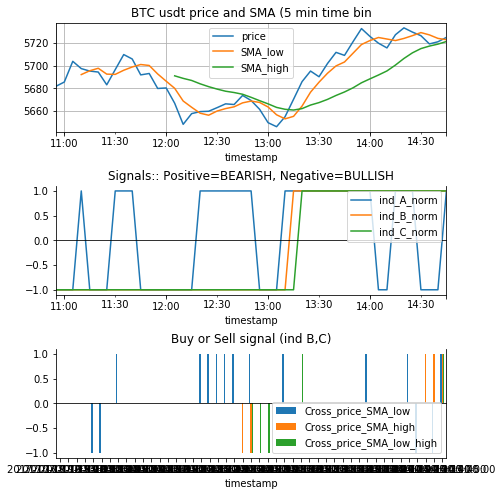

In [103]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(7,8))
fig.subplots_adjust(hspace=.5)
dfplot[['price','SMA_low','SMA_high']].plot(ax=ax1, grid=True, title='BTC usdt price and SMA (5 min time bin')
dfplot[['ind_A_norm','ind_B_norm','ind_C_norm']].plot(ax=ax2, kind='line', title='Signals:: Positive=BEARISH, Negative=BULLISH')
dfplot[['Cross_price_SMA_low','Cross_price_SMA_high','Cross_price_SMA_low_high']].plot(ax=ax3, kind='bar', ylim=[-1.1,1.1], title='Buy or Sell signal')
#ax3.bar(dfplot[['Signal_B','Signal_C']])


ax2.spines['top'].set_position('zero')
ax3.spines['top'].set_position('zero')
ax3.legend(loc=4)

plt.show()

### Repeat the same for ETH